In [7]:
import os


In [8]:
data_path = os.getenv('HOME')+ '/aiffel/ocr_python/image_1'
data_path

'/aiffel/aiffel/ocr_python/image_1'

In [9]:
file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)
file_path

['/aiffel/aiffel/ocr_python/image_1/image1.PNG',
 '/aiffel/aiffel/ocr_python/image_1/image2.PNG',
 '/aiffel/aiffel/ocr_python/image_1/image3.PNG',
 '/aiffel/aiffel/ocr_python/image_1/image4.PNG',
 '/aiffel/aiffel/ocr_python/image_1/image5.PNG']

### Keras OCR

In [10]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [11]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
#image_urls = [
#    'https://img-ex.hellonature.co.kr/images/ex/PGD/ITEM/109/109109/109109_001_22.png?v=20220203111736478',
#    'https://img-ex.hellonature.co.kr/images/ex/PGD/ITEM/109/109349/109349_001_22.png?v=20220221150303001',
#    'https://img-ex.hellonature.co.kr/images/ex/PGD/ITEM/109/109106/109106_001_22.png?v=20220203111632053'
    
#]

#images = [ keras_ocr.tools.read(url) for url in image_urls]
#prediction_groups = [pipeline.recognize([url]) for url in image_urls]



images = [keras_ocr.tools.read(path) for path in file_path]
prediction_groups = [pipeline.recognize({path}) for path in file_path]

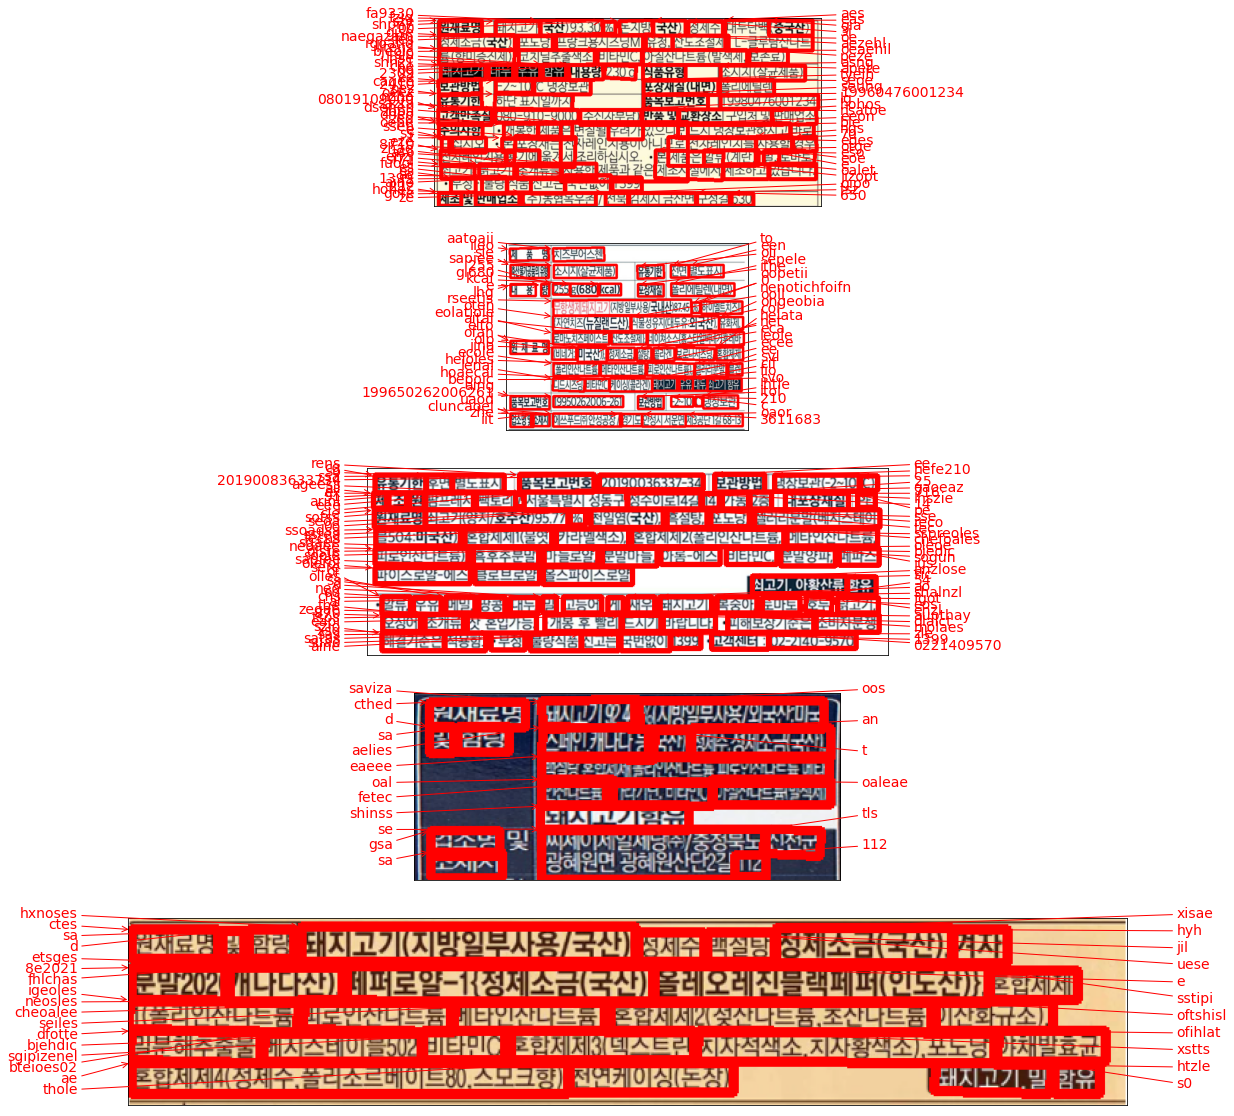

In [12]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 테서랙트(Tesseract) OCR

In [13]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")  #zfill 은 원하는 길이만큼 앞쪽에 0을 추가 해준다.
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


#work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

#img_file_path = work_dir + '/pororo.PNG'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

#cropped_image_path_list = crop_word_regions(img_file_path, work_dir)


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/'
    
    
tesseract_result_path = []
for path in file_path:
    image_path_list = crop_word_regions(path, work_dir)
    tesseract_result_path.extend(image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

In [14]:
def recognize_images(cropped_image_path_list, lang='kor'):
    custom_oem_psm_config = r' --oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang=lang,
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print('Done')



recognize_images(tesseract_result_path)

]<뻔은깝은은은은.큐,ㅅㄴㅅㅅㆍ , * ,ㆍ…ㄴㅅ40 ㄴ ㅣ 외  [ ㅣ 어ㆍ; ,*ㅋㄱㄴㆍㆍ ㄴㄴ  (여0 으뽀[ㄴ}＊},ㆍ,Ｌㄴㄴㄴㄴㆍㄴ＊※※ ㅣ/ㅅ＊**：|…,…‥，、：，：ㆍ，ｌＬ：：7 [ㅣ ,  . 0 00 0 | 0, ※ ㄴ ㅣ | -ㆍ^ / |]. 2|]]]【>+]?]【>]))])08 )】?87 】【7【}>}>7 ㅇㅁ《)]ㅎ< [/2＊＊《,＊<＊ 이 000으| -ㅅ×＊ㅅ^＊“〉“＊ㅇ 깝깝삽깝0깝0까《＊《$$《끼《-끄000끼시 으끼0깔 0 【【【【| 이 0600 다. 0 ｌ| 2 |], 애ㄴ 【【【【【【【【【]【【?【【??《【2【??《【2【ㄷ7【【ㄷ]ㄷ【2【9ㄷ009099{ㄷㄴㄷㄷ{{ㄷ209ㄷ9ㄷㄴㄷ{ㄷㅇ^ㅅ《버"ㅅㅁㅁ )?【?ㅁ2 =. 6)}?) 0 Ｌ--》, 22020 이 00000 이여 월인안《22〉2〉【}【}【}【}0』Ｌ』ㄴ』내0 8야※※＊#※＊※#※ 0/02 ~ ~. 20ㅁㅅㅅ 0 【【0【《ㅅ| 은 뼈0----------------0-~*ㄴ여,~ ㅎＬ/」*&ㆍㅅㆍㆍ&}ㆍ}ㆍ츠ㅅㅅ

워

새

렀등

ㄴㄴ;

및!

암당

량

|

대

|

년 /

기

|

지

방

일

_


~ .

7

22

시

,

석

세수

맥

실

당

?

성

제

수

럽


(국산),

산

),

겨자

자

두



캐

나

나?

사

0

페

떠

다

일

“………-

{정ㅅ

소

=

{:


|)

”

글2

|

눈

레?

시

들

래

1

-


(인5

^

자

1)

혼

입/

1


1

농

리

이

산

내


고


피

도

2

산

나

는

도


메

다

2

산

나

는

고

;

로

입/

|

|

0

25.

산

나

그

는

"

주

사

나

은

=




부

호


호

입시

^

|

1

성

제수

졸

래

~

드8

(


는

80

^

닌-


앙

0

저

년

1(

승


|

[돈송



0

ㆍ


래

람유


여00깅02읍2《ㅇ24<72빠0 애ㄴ〉×※4?.《0을《-0《00 《00끼《《《《끄×＊~＊~＊~＊〉~ㅇ40000004《+06ㅅ《, ㄴ[ㅎㅅㄴ*ㅇ0 0000000＊×8 《ㄷ 00000 ㅇ@0《ㅇㄷ0 《ㄷ309309ㅁ329아2히00 < 를 은 {【《ㅅ"00 ㄷ【《0 【 "}"'"}}《쓰   0끄  0,.*，。，×}+~-/ㅅ~ㅇ*Ｌ>Ｌ｜ㆍ~ ~：~~~ㅅ~ㅅㄴ^ *0. 【?【22【8【【=【=. 00 ㅣ , ,*.…,ㅅㆍ*ㄴ*ㄴ,ㄴ,：ㆍ으  ,，,|*ㆍ}ㆍㆍ;,ㆍ,;ㆍ….ㆍㄴㆍ;ㆍ4 .  [,  -- ㄷㄷ 00} ______르 >. 《 [【《|]【2]【2)27}》}》【}》》【]}}}}노&ㄴ：;르 0 》&//,.*,*&*，ㄱ:ㆍ〉;:：ㆍㆍ ㅋㅋ | ｌㅣ| 《/ㅅ| 00 【ㅅ은 의 ,, Ｌ|ㄴㄴㄴㄴㄴ ×ㄴㄴ× ㄴ.ㄴ〉×시 .|.||.,.,ㅣ ，｜6ㅇㅎ4ㄴ【*4ㅎㅠㄴ【ㅣ.|..ㄴ【께..ㅋ+288889909}【)ㅁ}【)}【)ㅠ~ |Ｌ{Ｌ<*^×,}ㅎㅎㅎ ㅎㅠㅎㅎㅇ ㄴㄴ쓰쓰쓰까ㄴㅇ ~,  60'|0죄 …]] 66

Done


### Google OCR

In [15]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [16]:


# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/pivotal-store-343006-b895eb4f27c5.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'



google_ocr_result = []
for path in file_path:
    result = detect_text(path)
    google_ocr_result.extend(result)
return google_ocr_result


total 82476
-rw-r--r-- 1 root root   738482 Feb 15 09:27 '10 Exp CIFAR-10.ipynb'
-rw-r--r-- 1 root root   938947 Feb 17 10:08 '11 exp ARIMA_stock.ipynb'
-rw-r--r-- 1 root root   117408 Feb 22 12:37  12_Exp_ChatBot.ipynb
-rw-r--r-- 1 root root   464439 Feb 28 00:05 '13 exp BERT.ipynb'
-rw-r--r-- 1 root root    53518 Mar  1 11:21 '14 exp Recommendation system.ipynb'
-rw-r--r-- 1 root root    55443 Mar  1 10:08 '14 exp test.ipynb'
-rw-r--r-- 1 root root  1240796 Mar  3 12:46 '15 Exp OCR.ipynb'
-rw-r--r-- 1 root root    22275 Jan 31 06:54 '21. TF2 API 개요.ipynb'
-rw-r--r-- 1 root root    22456 Feb 11 05:46 '23 deep learning layers.ipynb'
-rw-r--r-- 1 root root 13856578 Feb  3 12:33 '6_Exp_Shallow focus.ipynb'
-rw-r--r-- 1 root root   140422 Feb  8 09:34  8_Exp_News_Summary.ipynb
-rw-r--r-- 1 root root   412021 Feb 10 13:41  9_Exp_X-ray.ipynb
drwxr-xr-x 2 root root     4096 Feb 18 03:37  activation
-rw-r--r-- 1 root root    54079 Jan 12 16:00  aiffel_exp_digits_wine_cancer.ipynb
-rw-r--r-- 1

TypeError: 'NoneType' object is not iterable

### 회고: 

오래 전 부터 주차장 진입할 때 뜨는 챠량번호를 보며 단순히 카메라로 인식을 하나보다 막연히 생각했었는데 그것이 바로 OCR 기술이었다. 
OCR 개념을 알고 생각해보니 이미 내가 경험했던 OCR 순간들이 떠올랐다. 8년 전 스페인 여행을 하며 구글 번역기 어플로 사진을 찍으면 번역이 되었는데 그때가 8년 전이니 지금은 얼마나 OCR 기술이 발전했을지 확실히 와닿았다. 
그리고 OCR 에도 어텐션이 쓰인다고 하니 흥미로웠다. 하나의 개념이 여러 기술에 영향을 미친다니...

서비스 목적 기획:
소세지/햄 제품의 라벨 중 성분표기 된 이미지를 사용했다. 그 이유는 비슷해 보이는 소세지/햄 인데 어떤 제품에는 밀 함유이고 어떤 제품에는 우유가 들어가 있으며 어떤 제품에는 두 성분 모두 들어가 있지 않았다.  요즘처럼 비건/글루텐프리 가 하나의 식습관으로 자리 잡은 시기에 마트 온라인 몰에 필터 항목 중 비건 또는 글루텐 프리 항목이 생기면 좋겟다는 생각을 했다. 
제품의 성분표기 라벨을 OCR 로 읽어 내어 성분에 따라 비건제품/ 글루텐프리 제품 필터링에 활용하는 생각을 해보았다. 


Keras OCR은 라벨 이미지의 한글을 전혀 읽지 못하였고 테라서트도 의미있는 한글 데이터를 만들어내지 못했다. 
그래서 번거로웠지만(ㅎ) 신용카드 연결하고 구글 OCR도 시도 해보았다.  한글 단어를 많이 읽어 보여줬다. 세 모델 중 결과는 가장 좋았다. 

또 시간이 부족해 시각화를 못했다. 바로 어떻게 할지 알았다면 시각화까지 했을텐데, 방법이 바로 떠오르지 않았다. 
